# Truss Example 2

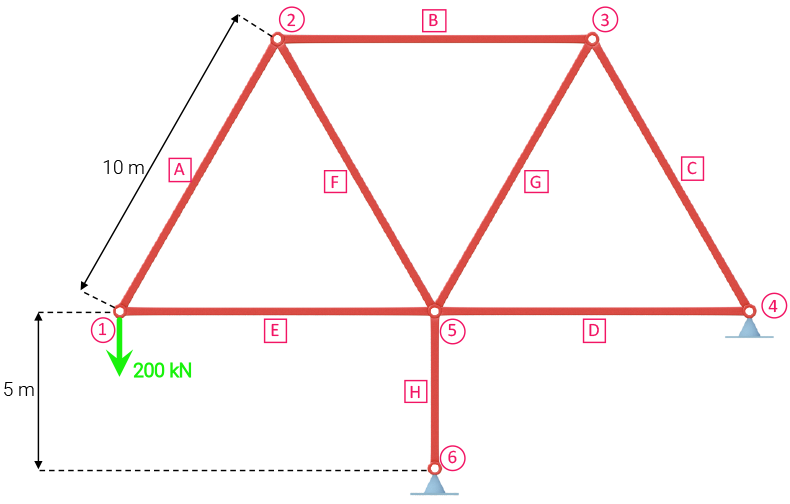

In [1]:
#DEPENDENCIES
import math #Math functionality
import numpy as np #Numpy for working with arrays
import matplotlib.pyplot as plt #Plotting functionality 

#Constants
E = 200*10**9 #(N/m^2)
A = 0.005 #(m^2)
nDoF = 12 #Total number of degrees of freedom in the problem
restrainedDoF = [7,8,11,12] #The degrees of freedom restrained by supports
forceVector = np.array([[0,-200000,0,0,0,0,0,0,0,0,0,0]]).T #Vector of externally applied forces

## Define a function to calculate member global stiffness matrix

In [2]:
#Define a function to calculate the global stiffness matrix of an axially loaded bar
def calculateKg(E,A,L,thetaDeg):
    """
    Calculate the global stiffness matrix for an axially loaded bar
    E: Young's modulus for the bar material
    A: Cross-sectional area of the bar
    L: Length of the bar
    thetaDeg: Angle of orientation with respect to global axis measured in degrees    
    """    
    theta = thetaDeg*math.pi/180 #Convert to radians
    
    c = math.cos(theta)
    s = math.sin(theta)
    
    K11 = (E*A/L)*np.array([[c**2,c*s],[c*s,s**2]]) #Top left quadrant of global stiffness matrix
    K12 = (E*A/L)*np.array([[-c**2,-c*s],[-c*s,-s**2]]) #Top right quadrant of global stiffness matrix   
    K21 = (E*A/L)*np.array([[-c**2,-c*s],[-c*s,-s**2]]) #Bottom left quadrant of global stiffness matrix   
    K22 = (E*A/L)*np.array([[c**2,c*s],[c*s,s**2]]) #Bottom right quadrant of global stiffness matrix          
    
    return [K11, K12, K21,K22]

## Calculate member stiffness matrices

In [3]:
[K11_A, K12_A, K21_A, K22_A] = calculateKg(E, A, 10, 60) #Member A (L = 10m, theta = 60 deg)
[K11_B, K12_B, K21_B, K22_B] = calculateKg(E, A, 10, 0) #Member B (L = 10m, theta = 0) 
[K11_C, K12_C, K21_C, K22_C] = calculateKg(E, A, 10, 300) #Member C (L = 10m, theta = 300 deg) 
[K11_D, K12_D, K21_D, K22_D] = calculateKg(E, A, 10, 180) #Member D (L = 10m, theta = 180 deg) 
[K11_E, K12_E, K21_E, K22_E] = calculateKg(E, A, 10, 0) #Member E (L = 10m, theta = 0) 
[K11_F, K12_F, K21_F, K22_F] = calculateKg(E, A, 10, 300) #Member F (L = 10m, theta = 300 deg) 
[K11_G, K12_G, K21_G, K22_G] = calculateKg(E, A, 10, 240) #Member G (L = 10m, theta = 240 deg) 
[K11_H, K12_H, K21_H, K22_H] = calculateKg(E, A, 5, 270) #Member H (L = 10m, theta = 270 deg) 

## Build the primary stiffness matrix

In [4]:
#Define a function to add element stiffness matrix to primary stiffness matrix
def addElementToKp(node_i, node_j, K11,K12,K21,K22):
    """
    Add element stiffness matrix to primary stiffness matrix
    node_i: The proximal node
    node_j: The distal node
    K11, K21, K21, K22: Four quadrants of the element's global stiffness matrix 
    """ 
    #Primary stiffness matrix indices associated with each node
    #i.e. node 1 occupies indices 0 and 1 (accessed in Python with [0:2])
    ia = 2*node_i-2 #index 0
    ib = 2*node_i-1 #index 1
    ja = 2*node_j-2 #index 2
    jb = 2*node_j-1 #index 3
    Kp[ia:ib+1,ia:ib+1] = Kp[ia:ib+1,ia:ib+1] + K11
    Kp[ia:ib+1,ja:jb+1] = Kp[ia:ib+1,ja:jb+1] + K12
    Kp[ja:jb+1,ia:ib+1] = Kp[ja:jb+1,ia:ib+1] + K21
    Kp[ja:jb+1,ja:jb+1] = Kp[ja:jb+1,ja:jb+1] + K22
    
    return Kp

In [5]:
#Initialise the primary stiffness matrix
Kp = np.zeros([nDoF,nDoF])

#Add each element's contribution to the primary stiffness matrix
Kp = addElementToKp(1,2,K11_A, K12_A, K21_A, K22_A) #Element A
Kp = addElementToKp(2,3,K11_B, K12_B, K21_B, K22_B) #Element B
Kp = addElementToKp(3,4,K11_C, K12_C, K21_C, K22_C) #Element C
Kp = addElementToKp(4,5,K11_D, K12_D, K21_D, K22_D) #Element D
Kp = addElementToKp(1,5,K11_E, K12_E, K21_E, K22_E) #Element E
Kp = addElementToKp(2,5,K11_F, K12_F, K21_F, K22_F) #Element F
Kp = addElementToKp(3,5,K11_G, K12_G, K21_G, K22_G) #Element G
Kp = addElementToKp(5,6,K11_H, K12_H, K21_H, K22_H) #Element H

# Extract structure stiffness matrix, Ks

In [6]:
restrainedIndex = [x - 1 for x in restrainedDoF] #Index for each restrained DoF (list comprehension)

#Reduce to structure stiffness matrix by deleting rows and columns for restrained DoF
Ks = np.delete(Kp,restrainedIndex,0) #Delete rows
Ks = np.delete(Ks,restrainedIndex,1) #Delete columns
Ks = np.matrix(Ks) # Convert Ks from numpy.ndarray to numpy.matrix to use build in inverter function

## Solve for displacements

In [7]:
forceVector = np.delete(forceVector,restrainedIndex,0) #Delete rows corresponding to restrained DoF
U = Ks.I*forceVector
print("The horizontal displacement at node 1 is {one} m (to the right)".format(one=np.round(U[0,0],3)))
print("The vertical displacement at node 1 is {one} m (downwards)".format(one=np.round(U[1,0],3)))

The horizontal displacement at node 1 is 0.002 m (to the right)
The vertical displacement at node 1 is -0.019 m (downwards)


## Solve for reactions

In [12]:
#Construct the global displacement vector
UG = np.concatenate((U[0:6],np.zeros([2,1])),axis=0)
UG = np.concatenate((UG[0:8],U[6:9]),axis=0)
UG = np.concatenate((UG[0:10],np.zeros([2,1])),axis=0)
FG = np.matmul(Kp,UG)

print("Horizontal reaction at node 4 is {one} kN".format(one = round(FG[6,0]/1000,2) ))
print("Vertical reaction at node 4 is {one} kN".format(one = round(FG[7,0]/1000,2)) )
print("Horizontal reaction at node 6 is {one} kN".format(one = round(FG[10,0]/1000,2)) )
print("Vertical reaction at node 6 is {one} kN".format(one = round(FG[11,0]/1000,2)) )

Horizontal reaction at node 4 is -0.0 kN
Vertical reaction at node 4 is -200.0 kN
Horizontal reaction at node 6 is 0.0 kN
Vertical reaction at node 6 is 400.0 kN


## Solve for member forces

In [9]:
#Write a function that calculates member forces based on nodal displacements
def calculateForce(E,A,L,theta,Ua,Ub):
    """
    Calculate the internal member force based on nodal displacement
    E: Young's modulus for the bar material
    A: Cross-sectional area of the bar
    L: Length of the bar
    theta: Angle of orientation with respect to global axis    
    Ua: [Ua_x, Ua_y] global nodal displacement at node A
    Ub: [Ub_x, Ub_y] global nodal displacement at node B
    """  
    #Transformation matrix
    c = math.cos(theta)
    s = math.sin(theta)
    T = np.array([[c,s,0,0],[0,0,c,s]])
    disp = np.array([[Ua[0],Ua[1],Ub[0],Ub[1]]]).T        
    disp_local = np.matmul(T,disp)    
    
    F_axial = (A*E/L)*(disp_local[1]-disp_local[0])[0]
        
    return F_axial

In [14]:
#Calculate member forces
F_A = calculateForce(E,A,10,1.047,[UG[0,0],UG[1,0]],[UG[2,0],UG[3,0]]) #Nodes 1 to 2
F_B = calculateForce(E,A,10,0,[UG[2,0],UG[3,0]],[UG[4,0],UG[5,0]]) #Nodes 2 to 3
F_C = calculateForce(E,A,10,5.236,[UG[4,0],UG[5,0]],[UG[6,0],UG[7,0]]) #Nodes 3 to 4
F_D = calculateForce(E,A,10,3.142,[UG[6,0],UG[7,0]],[UG[8,0],UG[9,0]]) #Nodes 4 to 5
F_E = calculateForce(E,A,10,0,[UG[0,0],UG[1,0]],[UG[8,0],UG[9,0]]) #Nodes 1 to 5
F_F = calculateForce(E,A,10,5.236,[UG[2,0],UG[3,0]],[UG[8,0],UG[9,0]]) #Nodes 2 to 5
F_G = calculateForce(E,A,10,4.189,[UG[4,0],UG[5,0]],[UG[8,0],UG[9,0]]) #Nodes 3 to 5
F_H = calculateForce(E,A,5,4.712,[UG[8,0],UG[9,0]],[UG[10,0],UG[11,0]]) #Nodes 5 to 6

print("The force in element A is {one} kN".format(one=(np.round(F_A/1000,2))))
print("The force in element B is {one} kN".format(one=(np.round(F_B/1000,2))))
print("The force in element C is {one} kN".format(one=(np.round(F_C/1000,2))))
print("The force in element D is {one} kN".format(one=(np.round(F_D/1000,2))))
print("The force in element E is {one} kN".format(one=(np.round(F_E/1000,2))))
print("The force in element F is {one} kN".format(one=(np.round(F_F/1000,2))))
print("The force in element G is {one} kN".format(one=(np.round(F_G/1000,2))))
print("The force in element H is {one} kN".format(one=(np.round(F_H/1000,2))))

The force in element A is 230.68 kN
The force in element B is 230.94 kN
The force in element C is 230.95 kN
The force in element D is -115.39 kN
The force in element E is -115.47 kN
The force in element F is -230.93 kN
The force in element G is -230.8 kN
The force in element H is -399.91 kN


## Plotting

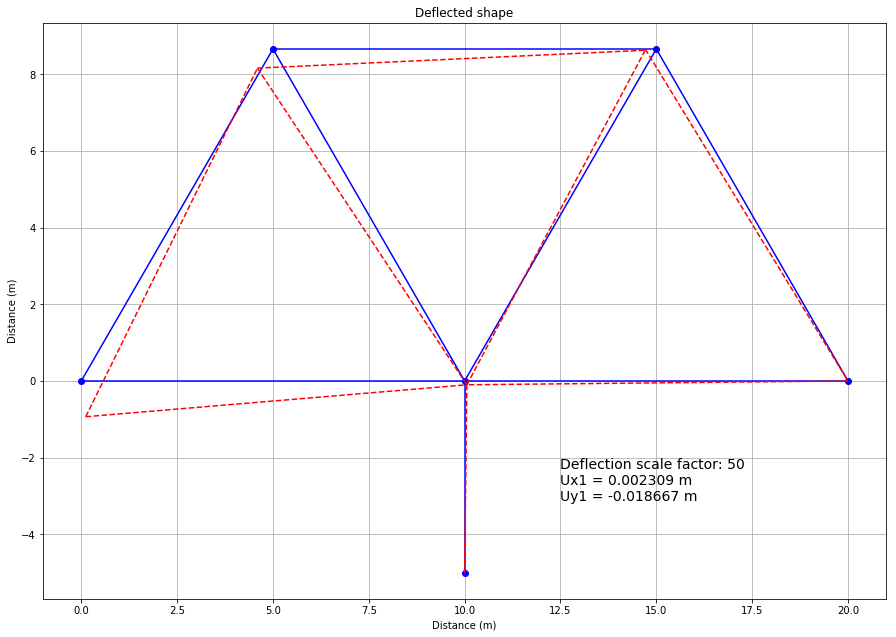

In [11]:
xFac = 50
label = "Deflection scale factor: " + str(xFac) + "\nUx1 = "+str(round(UG[0,0],6)) +" m\nUy1 = "+str(round(UG[1,0],6))+" m"

fig = plt.figure() 
axes = fig.add_axes([0.1,0.1,2,2]) 
fig.gca().set_aspect('equal', adjustable='box')

#Plot the undeformed members
axes.plot([0,5],[0,8.66],'b') #Member A
axes.plot([5,15],[8.66,8.66],'b') #Member B
axes.plot([15,20],[8.66,0],'b') #Member C
axes.plot([20,10],[0,0],'b') #Member D
axes.plot([0,10],[0,0],'b') #Member E
axes.plot([5,10],[8.66,0],'b') #Member F
axes.plot([15,10],[8.66,0],'b') #Member G
axes.plot([10,10],[0,-5],'b') #Member H

#Plot undeformed nodal positions
axes.plot([0],[0],'bo') #Node 1
axes.plot([5],[8.66],'bo') #Node 2
axes.plot([15],[8.66],'bo') #Node 3
axes.plot([20],[0],'bo') #Node 4
axes.plot([10],[0],'bo') #Node 5
axes.plot([10],[-5],'bo') #Node 6

#Plot deformed members
axes.plot([0+UG[0,0]*xFac,5+UG[2,0]*xFac],[0+UG[1,0]*xFac,8.66+UG[3,0]*xFac],'--r') #Member A
axes.plot([5+UG[2,0]*xFac,15+UG[4,0]*xFac],[8.66+UG[3,0]*xFac,8.66+UG[5,0]*xFac],'--r') #Member B
axes.plot([15+UG[4,0]*xFac,20+UG[6,0]*xFac],[8.66+UG[6,0]*xFac,0+UG[7,0]*xFac],'--r') #Member C
axes.plot([20+UG[6,0]*xFac,10+UG[8,0]*xFac],[0+UG[7,0]*xFac,0+UG[9,0]*xFac],'--r') #Member D
axes.plot([0+UG[0,0]*xFac,10+UG[8,0]*xFac],[0+UG[1,0]*xFac,0+UG[9,0]*xFac],'--r') #Member E
axes.plot([5+UG[2,0]*xFac,10+UG[8,0]*xFac],[8.66+UG[3,0]*xFac,0+UG[9,0]*xFac],'--r') #Member F
axes.plot([15+UG[4,0]*xFac,10+UG[8,0]*xFac],[8.66+UG[5,0]*xFac,0+UG[9,0]*xFac],'--r') #Member G
axes.plot([10+UG[8,0]*xFac,10+UG[10,0]*xFac],[0+UG[9,0]*xFac,-5+UG[11,0]*xFac],'--r') #Member H

plt.text(12.5, -2, label, fontsize=14,verticalalignment='top',)
axes.set_xlabel('Distance (m)')
axes.set_ylabel('Distance (m)')
axes.set_title('Deflected shape')
axes.grid()
plt.show()